In [1]:
import dask
import dask.dataframe as dd
import dask.array as da 
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from dask_ml.metrics import r2_score
from dask_ml.model_selection import train_test_split
from joblib import parallel_backend
from sklearn.ensemble import RandomForestRegressor
from dask import delayed

/opt/tljh/user/lib/python3.6/site-packages/dask/dataframe/utils.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from dask.distributed import Client
client = Client(processes=False, threads_per_worker=30,
                n_workers=5)
client

Client Scheduler: inproc://130.89.216.106/5079/1 Dashboard: http://localhost:8787/status,Cluster Workers: 5 Cores: 150 Memory: 33.63 GB


In [3]:
path_in = r'5.csv'
Z = da.from_array(np.loadtxt(path_in, dtype=np.float, delimiter=","))
Z

dask.array<array, shape=(453629, 23), dtype=float64, chunksize=(453629, 23)>

In [4]:
X = Z[:,1:]
Y = Z[:,0]
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3, train_size=0.7)

In [5]:
rf = RandomForestRegressor(n_estimators=100, criterion="mse", max_depth=None, max_features="auto", bootstrap=True, min_samples_split=2, n_jobs=1)
rf

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [6]:
from joblib import parallel_backend

with parallel_backend('dask'):
    rf.fit(xtrain, ytrain)

In [7]:
ypred = rf.predict(xtest)
r2 = round(r2_score(ytest, ypred), 2)
print("RF01: ", r2)
zipped_rf = list (zip (rf.feature_importances_))
print(zipped_rf)

RF01:  0.15
[(0.07213830428217942,), (0.0344998286631899,), (0.059519089118347274,), (0.24323925054011283,), (0.30103458120418586,), (0.09973253870627317,), (0.09426417264155697,), (0.07560571226727186,), (0.0009320416430813528,), (0.0004185605675560815,), (0.0012509063411713702,), (0.0009364175609048659,), (0.0010230881494148912,), (7.796577064530295e-05,), (2.459319357232024e-05,), (0.002316928704943078,), (0.0007403279932935864,), (0.0009399868662528465,), (0.00046982173971475775,), (3.2914805994566916e-06,), (0.002223820754329115,), (0.008608771811403697,)]


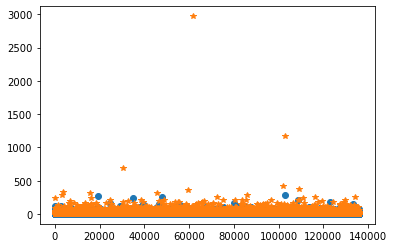

In [10]:
import matplotlib.pyplot as plt
plt.plot(ypred, "o")
plt.plot(ytest, "*")
plt.show()

In [13]:
xtestnl = pd.read_csv(r'1.csv', header = None, usecols=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22])
metadata = pd.read_csv(r'1.csv', header = None, usecols=[0])

In [15]:
yprednl = rf.predict(xtestnl).reshape(-1, 1)
yprednl = np.array(yprednl, int)
metadata = np.array(metadata, int)
stack = np.hstack((metadata, yprednl))
print(stack)

[[ 2 21]
 [ 4 25]
 [ 1 13]
 ...
 [ 3  9]
 [ 3 10]
 [ 1 11]]
